# **Data Cleaning and Exploratory Data Analysis on Driver Behavior Dataset**
*by Jimalyn Del Rosario*


Kaggle link: https://www.kaggle.com/datasets/datasetengineer/driver-behavior-and-route-anomaly-dataset-dbra24


## Loading dataset

In [18]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("datasetengineer/driver-behavior-and-route-anomaly-dataset-dbra24")

In [19]:
path

'/kaggle/input/driver-behavior-and-route-anomaly-dataset-dbra24'

In [20]:
os.listdir(path)

['driver_behavior_route_anomaly_dataset_with_derived_features.csv']

## Initial dataset exploration for cleaning

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
driver_behavior = pd.read_csv(os.path.join(path, "driver_behavior_route_anomaly_dataset_with_derived_features.csv"))

In [23]:
driver_behavior.head()

,trip_id,driver_id,vehicle_id,timestamp,latitude,longitude,speed,acceleration,steering_angle,heading,...,weather_conditions,road_type,traffic_condition,stop_events,geofencing_violation,anomalous_event,route_anomaly,route_deviation_score,acceleration_variation,behavioral_consistency_index
0,1,101,1001,2023-01-01 00:00:00,38.916143,-80.345269,39.484646,3.612832,6,212.555994,...,Sunny,Urban,Light,0,0,0,0,0.176974,0.715284,0.468189
1,2,105,2002,2023-01-01 00:00:01,37.011830,-89.079516,2.795422,-0.593295,-21,134.541146,...,Sunny,Highway,Light,0,0,1,0,0.229316,0.487761,0.234935
2,3,103,2002,2023-01-01 00:00:02,33.784009,-99.103643,13.842558,-0.209264,26,116.452839,...,Cloudy,Urban,Moderate,0,0,0,0,0.473809,0.881141,0.192588
3,4,102,2002,2023-01-01 00:00:03,45.314835,-102.046210,69.121833,-0.413943,6,26.970247,...,Sunny,Highway,Moderate,3,0,0,0,0.368063,0.937918,0.363707
4,5,101,2002,2023-01-01 00:00:04,30.473386,-92.362577,13.061111,5.774122,-1,333.804023,...,Sunny,Rural,Moderate,0,0,0,0,0.145270,0.702187,0.178748


In [24]:
driver_behavior.tail()

,trip_id,driver_id,vehicle_id,timestamp,latitude,longitude,speed,acceleration,steering_angle,heading,...,weather_conditions,road_type,traffic_condition,stop_events,geofencing_violation,anomalous_event,route_anomaly,route_deviation_score,acceleration_variation,behavioral_consistency_index
119995,119996,101,1001,2023-01-02 09:19:55,43.054036,-86.197119,10.263763,-0.802541,18,53.521771,...,Sunny,Urban,Moderate,0,0,0,0,0.232350,0.375641,0.067177
119996,119997,101,2002,2023-01-02 09:19:56,35.551541,-73.439461,40.431564,-0.532927,18,86.945711,...,Foggy,Urban,Moderate,1,1,1,0,0.431830,0.822901,0.096263
119997,119998,101,1001,2023-01-02 09:19:57,41.964624,-95.333223,53.893048,0.734331,7,288.027901,...,Rainy,Highway,Moderate,2,0,0,0,0.089747,0.817555,0.171400
119998,119999,101,2002,2023-01-02 09:19:58,30.356801,-79.892936,65.559146,0.366847,-11,249.409519,...,Cloudy,Urban,Light,1,0,0,0,0.614545,0.798756,0.452616
119999,120000,101,1001,2023-01-02 09:19:59,32.707254,-92.526916,10.351467,-0.321536,2,71.344715,...,Cloudy,Urban,Moderate,2,0,0,0,0.150682,0.753897,0.393896


In [25]:
driver_behavior.shape

(120000, 26)

In [26]:
driver_behavior.columns

Index(['trip_id', 'driver_id', 'vehicle_id', 'timestamp', 'latitude',
       'longitude', 'speed', 'acceleration', 'steering_angle', 'heading',
       'trip_duration', 'trip_distance', 'fuel_consumption', 'rpm',
       'brake_usage', 'lane_deviation', 'weather_conditions', 'road_type',
       'traffic_condition', 'stop_events', 'geofencing_violation',
       'anomalous_event', 'route_anomaly', 'route_deviation_score',
       'acceleration_variation', 'behavioral_consistency_index'],
      dtype='object')

In [27]:
driver_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   trip_id                       120000 non-null  int64  
 1   driver_id                     120000 non-null  int64  
 2   vehicle_id                    120000 non-null  int64  
 3   timestamp                     120000 non-null  object 
 4   latitude                      120000 non-null  float64
 5   longitude                     120000 non-null  float64
 6   speed                         120000 non-null  float64
 7   acceleration                  120000 non-null  float64
 8   steering_angle                120000 non-null  int64  
 9   heading                       120000 non-null  float64
 10  trip_duration                 120000 non-null  float64
 11  trip_distance                 120000 non-null  float64
 12  fuel_consumption              120000 non-nul

In [28]:
driver_behavior.duplicated().sum()

np.int64(0)

In [29]:
driver_behavior.isna().sum()

,0
trip_id,0
driver_id,0
vehicle_id,0
timestamp,0
latitude,0
longitude,0
speed,0
acceleration,0
steering_angle,0
heading,0


In [41]:
df.nunique()

,0
trip_id,120000
driver_id,5
vehicle_id,5
timestamp,120000
latitude,120000
longitude,120000
speed,120000
acceleration,120000
steering_angle,91
heading,120000


In [48]:
object_type = driver_behavior.dtypes == 'object'
numerical_type = driver_behavior.dtypes != 'object'

In [52]:
obj_columns = list(object_type[object_type].index)
num_columns = list(numerical_type[numerical_type].index)

In [54]:
object_data = driver_behavior[obj_columns]
numerical_data = driver_behavior[num_columns]

In [55]:
object_data.nunique()

,0
timestamp,120000
weather_conditions,4
road_type,3
traffic_condition,3


In [56]:
numerical_data.nunique()

,0
trip_id,120000
driver_id,5
vehicle_id,5
latitude,120000
longitude,120000
speed,120000
acceleration,120000
steering_angle,91
heading,120000
trip_duration,120000


# **Data Cleaning**

In [37]:
df = driver_behavior.copy()

In [38]:
df.head()

,trip_id,driver_id,vehicle_id,timestamp,latitude,longitude,speed,acceleration,steering_angle,heading,...,weather_conditions,road_type,traffic_condition,stop_events,geofencing_violation,anomalous_event,route_anomaly,route_deviation_score,acceleration_variation,behavioral_consistency_index
0,1,101,1001,2023-01-01 00:00:00,38.916143,-80.345269,39.484646,3.612832,6,212.555994,...,Sunny,Urban,Light,0,0,0,0,0.176974,0.715284,0.468189
1,2,105,2002,2023-01-01 00:00:01,37.011830,-89.079516,2.795422,-0.593295,-21,134.541146,...,Sunny,Highway,Light,0,0,1,0,0.229316,0.487761,0.234935
2,3,103,2002,2023-01-01 00:00:02,33.784009,-99.103643,13.842558,-0.209264,26,116.452839,...,Cloudy,Urban,Moderate,0,0,0,0,0.473809,0.881141,0.192588
3,4,102,2002,2023-01-01 00:00:03,45.314835,-102.046210,69.121833,-0.413943,6,26.970247,...,Sunny,Highway,Moderate,3,0,0,0,0.368063,0.937918,0.363707
4,5,101,2002,2023-01-01 00:00:04,30.473386,-92.362577,13.061111,5.774122,-1,333.804023,...,Sunny,Rural,Moderate,0,0,0,0,0.145270,0.702187,0.178748


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trip_id                       120000 non-null  int64         
 1   driver_id                     120000 non-null  int64         
 2   vehicle_id                    120000 non-null  int64         
 3   timestamp                     120000 non-null  datetime64[ns]
 4   latitude                      120000 non-null  float64       
 5   longitude                     120000 non-null  float64       
 6   speed                         120000 non-null  float64       
 7   acceleration                  120000 non-null  float64       
 8   steering_angle                120000 non-null  int64         
 9   heading                       120000 non-null  float64       
 10  trip_duration                 120000 non-null  float64       
 11  trip_distance

In [57]:
df.nunique()

,0
trip_id,120000
driver_id,5
vehicle_id,5
timestamp,120000
latitude,120000
longitude,120000
speed,120000
acceleration,120000
steering_angle,91
heading,120000


## Converting to appropriate data types

In [53]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)

In [59]:
cat_columns = ["driver_id",
               "vehicle_id",
               "weather_conditions",
               "road_type",
               "traffic_condition",
               "geofencing_violation",
               "anomalous_event",
               "route_anomaly"]
df[cat_columns] = df[cat_columns].astype("category")

## Dropping unnecessary or redundant columns

In [61]:
cols_to_drop = ["trip_id",
                "latitude",
                "longitude",
                "heading"]

df = df.drop(columns=cols_to_drop)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   driver_id                     120000 non-null  category      
 1   vehicle_id                    120000 non-null  category      
 2   timestamp                     120000 non-null  datetime64[ns]
 3   speed                         120000 non-null  float64       
 4   acceleration                  120000 non-null  float64       
 5   steering_angle                120000 non-null  int64         
 6   trip_duration                 120000 non-null  float64       
 7   trip_distance                 120000 non-null  float64       
 8   fuel_consumption              120000 non-null  float64       
 9   rpm                           120000 non-null  float64       
 10  brake_usage                   120000 non-null  int64         
 11  lane_deviatio

# **Data Analysis**

In [63]:
df.head()

,driver_id,vehicle_id,timestamp,speed,acceleration,steering_angle,trip_duration,trip_distance,fuel_consumption,rpm,...,weather_conditions,road_type,traffic_condition,stop_events,geofencing_violation,anomalous_event,route_anomaly,route_deviation_score,acceleration_variation,behavioral_consistency_index
0,101,1001,2023-01-01 00:00:00,39.484646,3.612832,6,250.980424,24.868334,19.293594,8300.855056,...,Sunny,Urban,Light,0,0,0,0,0.176974,0.715284,0.468189
1,105,2002,2023-01-01 00:00:01,2.795422,-0.593295,-21,2112.678280,10.230086,2.011132,2290.934075,...,Sunny,Highway,Light,0,0,1,0,0.229316,0.487761,0.234935
2,103,2002,2023-01-01 00:00:02,13.842558,-0.209264,26,1134.936064,23.483279,4.025824,1299.930836,...,Cloudy,Urban,Moderate,0,0,0,0,0.473809,0.881141,0.192588
3,102,2002,2023-01-01 00:00:03,69.121833,-0.413943,6,11651.719966,1.480827,1.233628,3825.966601,...,Sunny,Highway,Moderate,3,0,0,0,0.368063,0.937918,0.363707
4,101,2002,2023-01-01 00:00:04,13.061111,5.774122,-1,1033.826911,131.294800,2.720884,2376.000694,...,Sunny,Rural,Moderate,0,0,0,0,0.145270,0.702187,0.178748


In [64]:
df.describe()

,timestamp,speed,acceleration,steering_angle,trip_duration,trip_distance,fuel_consumption,rpm,brake_usage,lane_deviation,stop_events,route_deviation_score,acceleration_variation,behavioral_consistency_index
count,120000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,2023-01-10 02:15:59.500000,29.971987,1.003904,0.082442,3593.505077,49.921316,4.987515,1991.533620,4.995767,0.285753,0.996800,0.285187,0.714811,0.285855
min,2023-01-01 00:00:00,0.000157,-0.999910,-45.000000,0.001821,0.000521,0.000016,500.015651,0.000000,0.000354,0.000000,0.000305,0.075593,0.000295
25%,2023-01-01 08:19:59.750000128,8.615250,-0.419030,-10.000000,1032.752956,14.319500,1.445889,927.900033,3.000000,0.161382,0.000000,0.160065,0.611532,0.160986
50%,2023-01-01 16:39:59.500000,20.633107,0.388639,0.000000,2484.164733,34.387936,3.464778,1535.258915,5.000000,0.264586,1.000000,0.263214,0.735854,0.264427
75%,2023-02-01 00:59:59.249999872,41.439832,1.777851,10.000000,4975.872175,69.138769,6.914018,2563.837376,6.000000,0.389144,2.000000,0.389066,0.838992,0.389694
max,2023-02-01 09:19:59,365.764111,22.032532,45.000000,46866.782872,586.424402,50.650228,18879.432692,19.000000,0.932762,8.000000,0.948786,0.999540,0.942612
std,NaN,30.211853,1.998322,14.870230,3595.552160,50.136007,4.965751,1498.933743,2.240727,0.159819,1.001481,0.159840,0.159045,0.160088


### Distribution of Key Variables

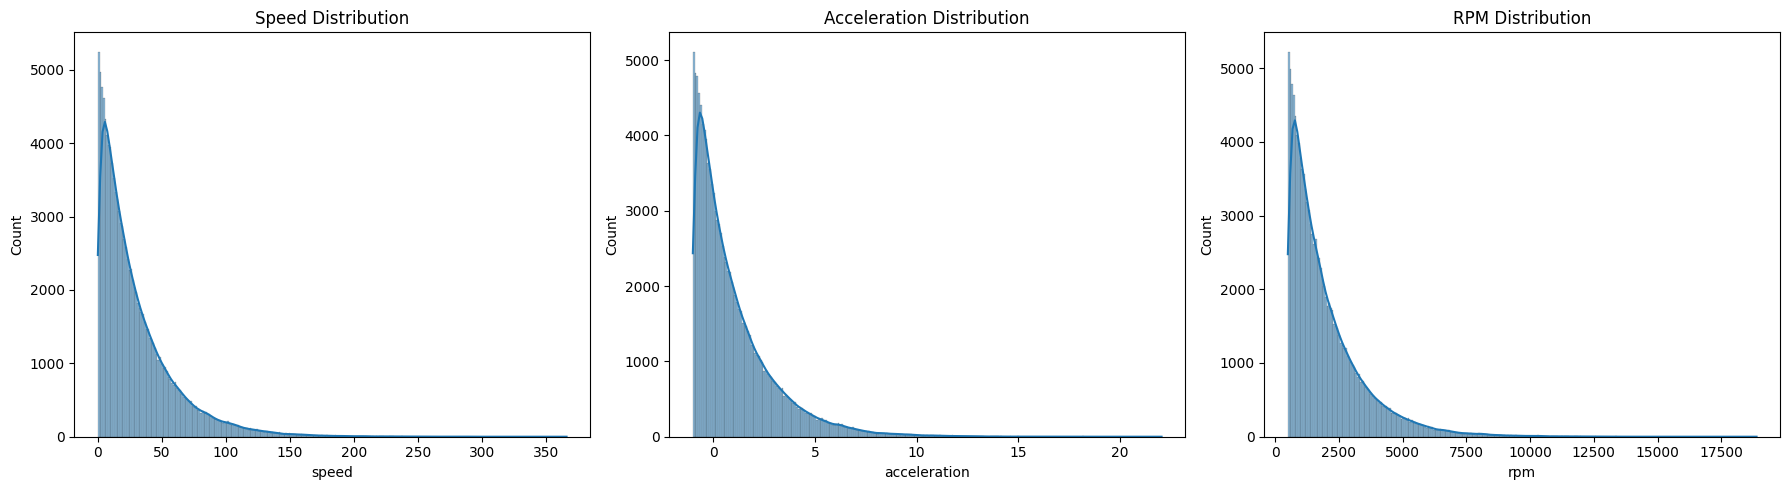

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Speed
sns.histplot(df['speed'], kde=True, ax=axes[0])
axes[0].set_title("Speed Distribution")

# Plot 2: Acceleration
sns.histplot(df['acceleration'], kde=True, ax=axes[1])
axes[1].set_title("Acceleration Distribution")

# Plot 3: RPM
sns.histplot(df['rpm'], kde=True, ax=axes[2])
axes[2].set_title("RPM Distribution")

# Tight layout for better spacing
plt.tight_layout()
plt.show()

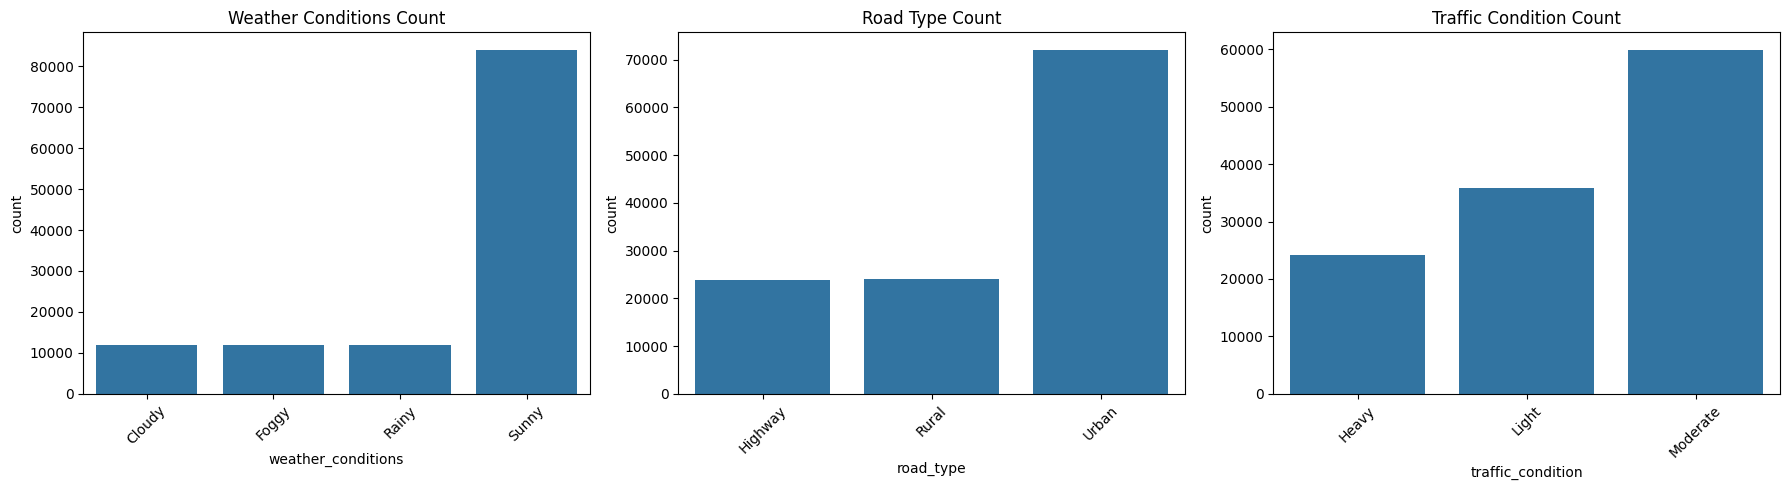

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Weather Conditions
sns.countplot(x='weather_conditions', data=df, ax=axes[0])
axes[0].set_title("Weather Conditions Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Road Type
sns.countplot(x='road_type', data=df, ax=axes[1])
axes[1].set_title("Road Type Count")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Traffic Condition
sns.countplot(x='traffic_condition', data=df, ax=axes[2])
axes[2].set_title("Traffic Condition Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Driver Comparison (Speed and Fuel Usage)

In [85]:
# Mean Speed per Driver
df.groupby('driver_id', observed=True)['speed'].mean()

,speed
driver_id,
101,29.993806
102,30.009727
103,30.159890
104,29.784628
105,29.787533


In [86]:
# Mean Fuel usage per Driver
df.groupby('driver_id', observed=True)['fuel_consumption'].mean()

,fuel_consumption
driver_id,
101,4.979577
102,5.004931
103,4.960402
104,5.003842
105,5.002703


In [89]:
# Mean Lane Deviation per Driver
df.groupby('driver_id', observed=True)['lane_deviation'].mean()

,lane_deviation
driver_id,
101,0.286028
102,0.285353
103,0.289280
104,0.283538
105,0.283896


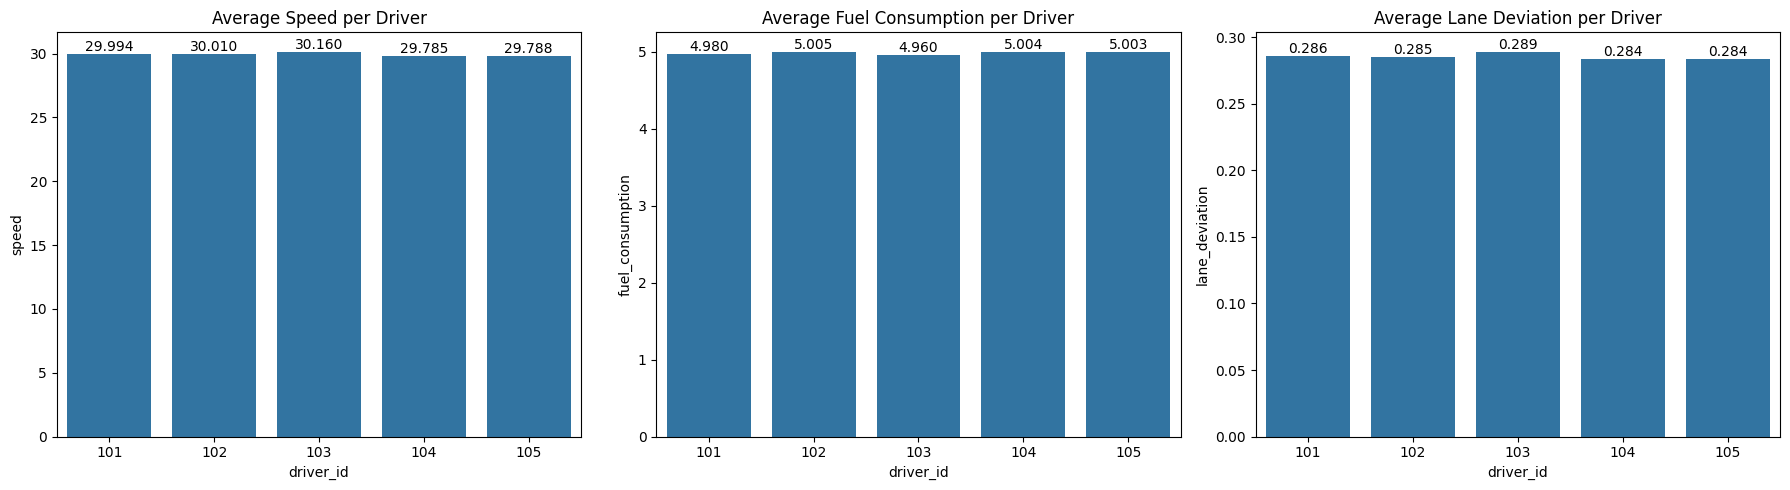

In [122]:
speed = df.groupby('driver_id', observed=True)['speed'].mean().reset_index()
fuel_usage = df.groupby('driver_id', observed=True)['fuel_consumption'].mean().reset_index()
lane_deviation = df.groupby('driver_id', observed=True)['lane_deviation'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

speed_plot = sns.barplot(x='driver_id', y='speed', data=speed, ax=axes[0])
axes[0].set_title('Average Speed per Driver')
axes[0].bar_label(speed_plot.containers[0], fmt='%.3f')

fuel_plot = sns.barplot(x='driver_id', y='fuel_consumption', data=fuel_usage, ax=axes[1])
axes[1].set_title('Average Fuel Consumption per Driver')
axes[1].bar_label(fuel_plot.containers[0], fmt='%.3f')

lane_dev_plot = sns.barplot(x='driver_id', y='lane_deviation', data=lane_deviation, ax=axes[2])
axes[2].set_title('Average Lane Deviation per Driver')
axes[2].bar_label(lane_dev_plot.containers[0], fmt='%.3f')

plt.tight_layout()
plt.show()

### Trip Frequencey by Hour

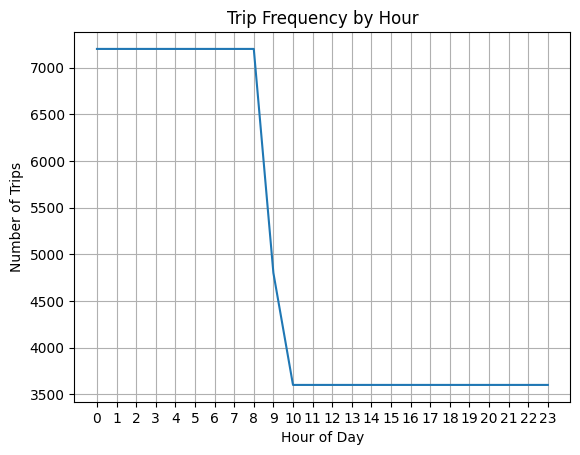

In [97]:
df['hour'] = df['timestamp'].dt.hour

df.groupby('hour', observed=True).size().plot(kind='line')
plt.title('Trip Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Trip Duration by Traffic Condition

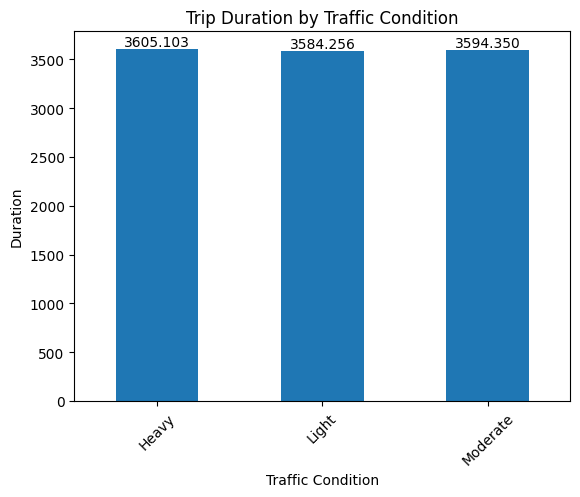

In [114]:
dur_cond_plot = df.groupby('traffic_condition', observed=True)['trip_duration'].mean().plot(kind='bar')
plt.title('Trip Duration by Traffic Condition')
plt.xlabel('Traffic Condition')
plt.ylabel('Duration')
plt.tick_params(axis='x', rotation=45)
plt.bar_label(dur_cond_plot.containers[0], fmt='%.3f')
plt.show()

### Fuel Consumption by Road Type

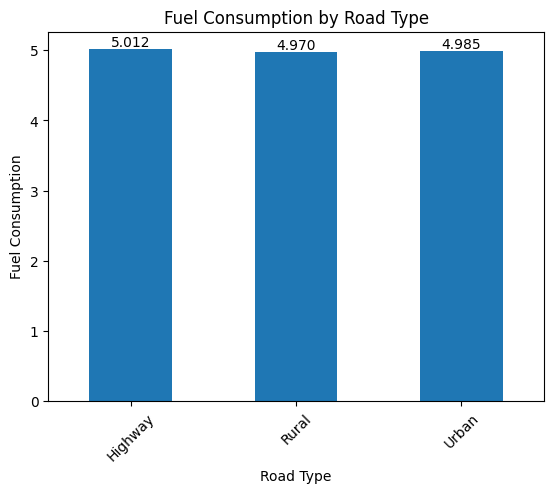

In [116]:
fuel_road_plot = df.groupby('road_type', observed=True)['fuel_consumption'].mean().plot(kind='bar')
plt.title('Fuel Consumption by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Fuel Consumption')
plt.tick_params(axis='x', rotation=45)
plt.bar_label(fuel_road_plot.containers[0], fmt='%.3f')
plt.show()

### Brake usage by Weather Condition


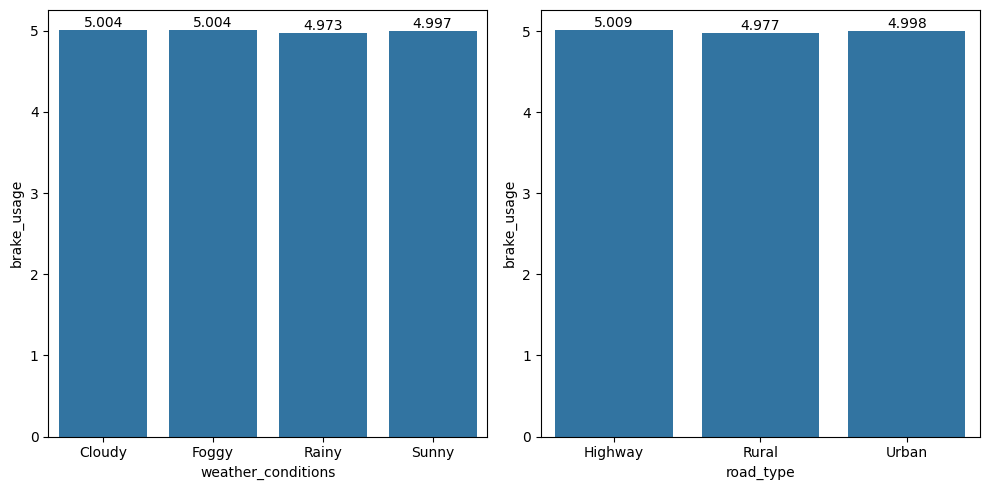

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

brake_data = df.groupby('weather_conditions', observed=True)['brake_usage'].mean().reset_index()
brake_weather_plot = sns.barplot(x='weather_conditions', y='brake_usage', data=brake_data, ax=axes[0])
axes[0].bar_label(brake_weather_plot.containers[0], fmt='%.3f')

road_data = df.groupby('road_type', observed=True)['brake_usage'].mean().reset_index()
brake_road_plot = sns.barplot(x='road_type', y='brake_usage', data=road_data, ax=axes[1])
axes[1].bar_label(brake_road_plot.containers[0], fmt='%.3f')

plt.tight_layout()
plt.show()

### Anomaly Frequency

In [131]:
df[['anomalous_event', 'route_anomaly', 'geofencing_violation']].astype(int).sum()

,0
anomalous_event,12020
route_anomaly,11965
geofencing_violation,6029
